# 5. Исследование данных авиакомпании — проверить гипотезу о повышении спроса во время фестивалей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открываем-файл-с-данными-и-изучаем-общую-информацию" data-toc-modified-id="Открываем-файл-с-данными-и-изучаем-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открываем файл с данными и изучаем общую информацию</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загружаем-данные" data-toc-modified-id="Загружаем-данные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загружаем данные</a></span></li><li><span><a href="#Таблица-aircrafts(query_1.csv)" data-toc-modified-id="Таблица-aircrafts(query_1.csv)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Таблица aircrafts(query_1.csv)</a></span></li><li><span><a href="#Таблица-flights(query_3.csv)" data-toc-modified-id="Таблица-flights(query_3.csv)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Таблица flights(query_3.csv)</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Описание проекта

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

# Изучение данных из файла

# Описание данных

**query_1.csv — результат первого запроса.**

В нём содержится информация о:
* *model* — модели самолета
* *flights_amount* — количество рейсов для каждой модели самолетов model в сентябре 2018 года

**query_3.csv  — результат третьего запроса.**

В нём содержится информация о:
* *city* — городах
* *average_flights* — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

Для этих двух наборов данных нужно:
* импортировать файлы;
* изучить данные в них;
* проверить типы данных на корректность;
* выбрать топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* сделать выводы по каждому из графиков, пояснить результат.

## Открываем файл с данными и изучаем общую информацию

### Импорт библиотек

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50) #устанавливаем максимальное число отображаемых колонок
pd.set_option('display.max_rows', 100)

def load_csv_choose_path(file):
    if os.path.exists(file):
        db = pd.read_csv(file)
    elif os.path.exists('/datasets/'+file):
        db = pd.read_csv('/datasets/'+file)
    else:
        raise FileNotFoundError(file)
    return db

### Загружаем данные

In [2]:
aircrafts = load_csv_choose_path('query_1.csv')
flights = load_csv_choose_path('query_3.csv')

### Таблица aircrafts(query_1.csv)

In [3]:
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
aircrafts

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
aircrafts.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Дубликатов и пропусков нет. Тип данных корректный.

Исправлять в данных ничего не надо.

### Таблица flights(query_3.csv)

In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
flights.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [8]:
flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [9]:
sum(flights.duplicated())

0

Дубликатов и пропусков нет. Тип данных корректный.

Исправлять в данных ничего не надо.

## Подготовка данных

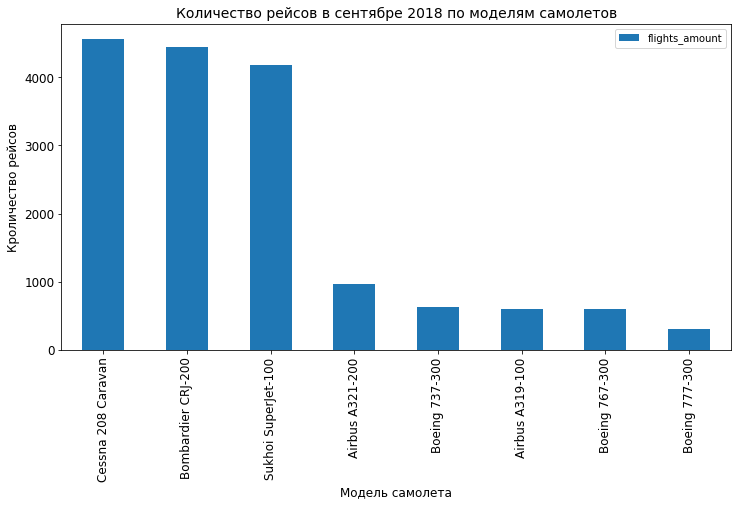

In [10]:
aircrafts.sort_values(by='flights_amount', ascending=False).plot(x='model', y='flights_amount', kind='bar',figsize=(12, 6), fontsize=12)
plt.xlabel('Модель самолета', fontsize=12)
plt.ylabel('Кроличество рейсов', fontsize=12)
plt.title('Количество рейсов в сентябре 2018 по моделям самолетов' , fontsize=14)
plt.show();

По количеству рейсов лидируют ближнемагистральные самолеты вместимостью до 100 пассажиров и максимальной дальностью полета до 3000 км, лидируют 3 модели самолетов:

1. Cessna 208 Caravan
2. Bombardier CRJ-200
3. Sukhoi SuperJet-100

Дальности полетов этих самолетов достаточно для перелетов по центральной части России, а небольшой самолет проще заполнить, чем дальнемагистальные самолеты типа Боинг-767 и Боинг-777 вместимостью 300-400 пассажиров

In [11]:
flights.sort_values('average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


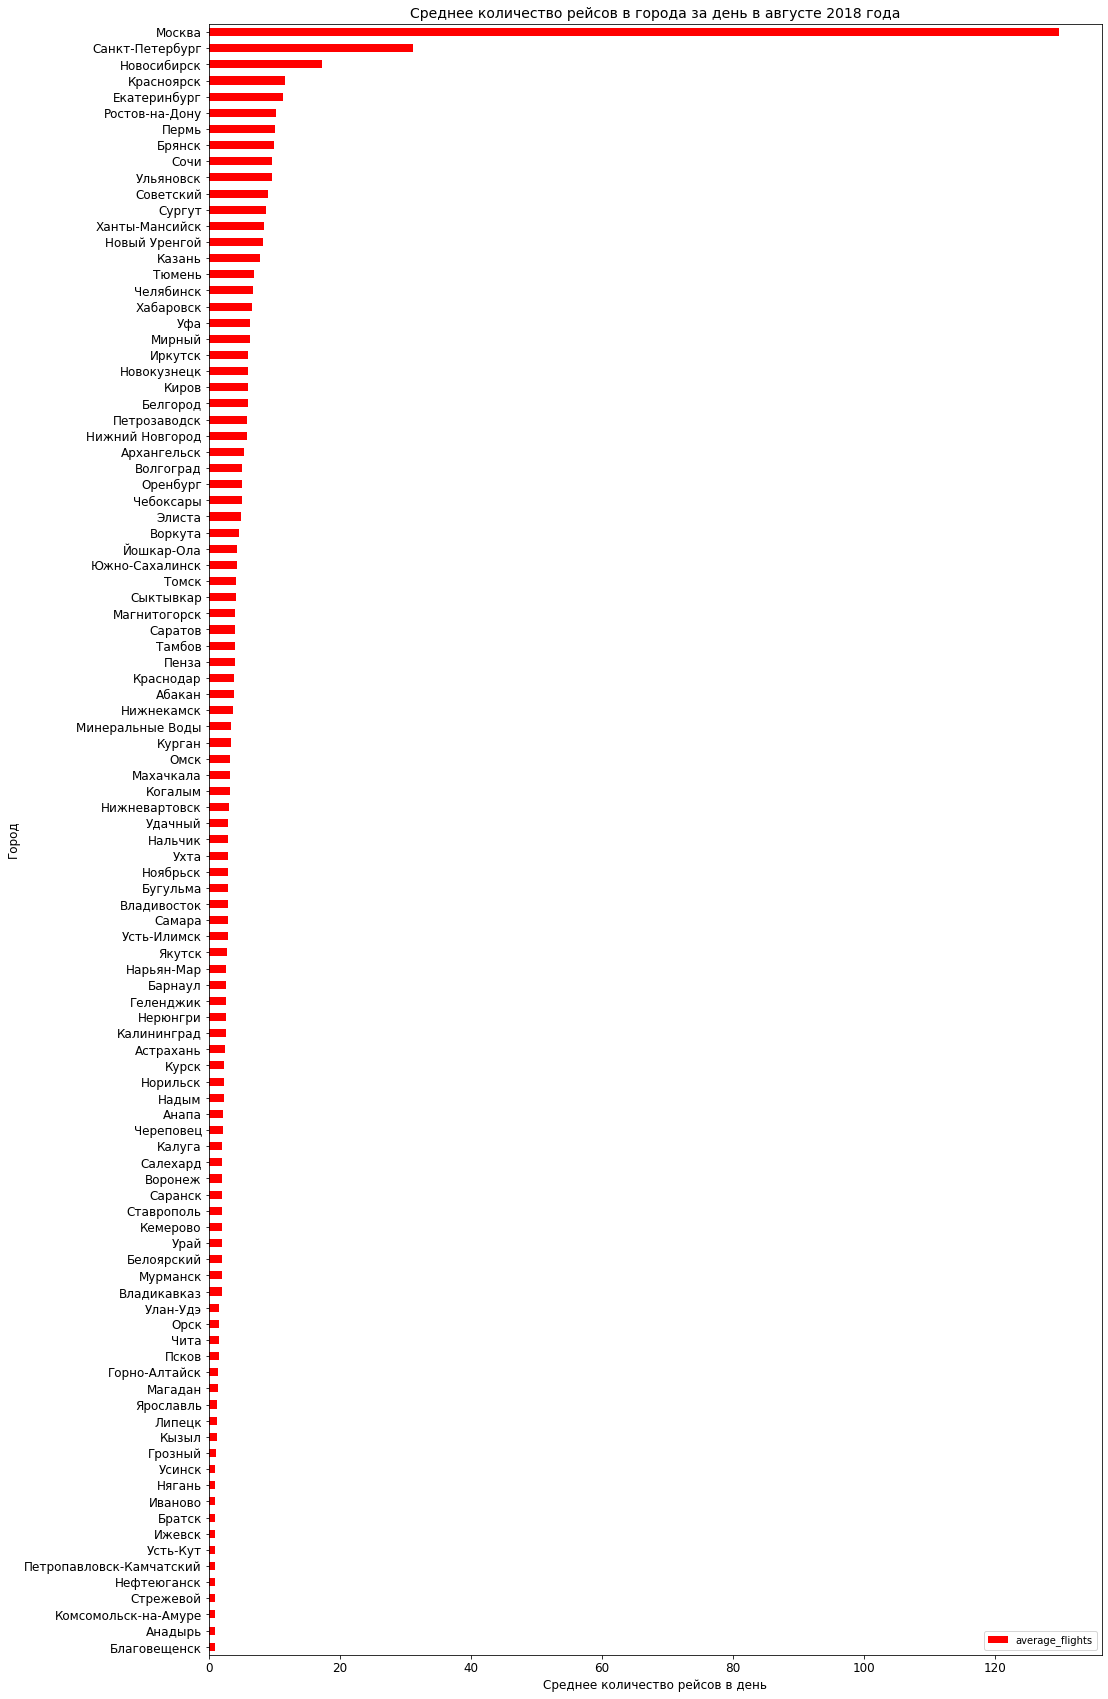

In [12]:
flights.sort_values(by='average_flights').plot(x='city', y='average_flights', kind='barh',figsize=(16, 30), color ='r', fontsize=12)
plt.ylabel('Город', fontsize=12)
plt.xlabel('Cреднее количество рейсов в день', fontsize=12)
plt.title('Cреднее количество рейсов в города за день в августе 2018 года' , fontsize=14)
plt.show();

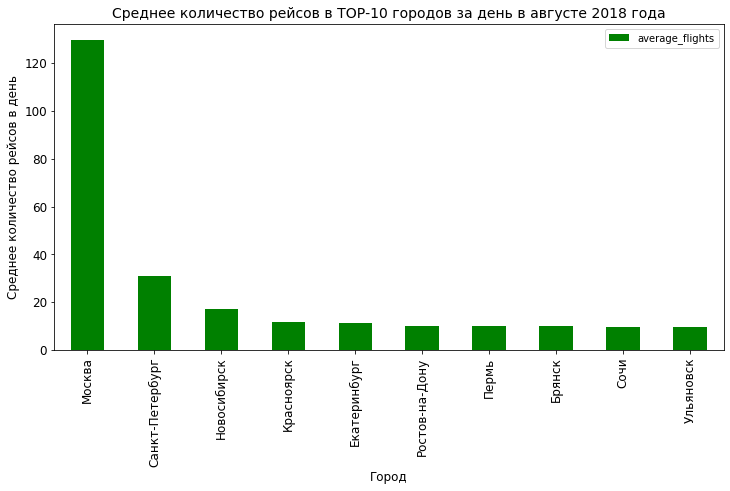

In [13]:
flights.sort_values(by='average_flights', ascending=False).head(10).plot(x='city', y='average_flights', kind='bar',figsize=(12, 6), color ='g', fontsize=12)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Cреднее количество рейсов в день', fontsize=12)
plt.title('Cреднее количество рейсов в TOP-10 городов за день в августе 2018 года' , fontsize=14)
plt.show();

По количеству рейсов в день лидирует Москва, на 2 месте находится аэропорт северной столицы Пулково, на 3 месте находится крупнейший за Уралом аэропорт Толмачёво (Новосибирск). Аэропорт Толмачёво находится на пересечении большого числа воздушных линий, идущих из Юго-Восточной Азии в Европу и из Северной Америки в Индию и Азию. 

Далее идут аэропорты крупных городов России (Красноярск, Екатеринбург(четвёртый по численности населения город в России), Ростов-на-Дону).

## Вывод

По количеству рейсов лидируют ближнемагистральные самолеты вместимостью до 100 пассажиров и дальностью полета до 3000 км, лидируют 3 модели самолетов:

* Cessna 208 Caravan
* Bombardier CRJ-200
* Sukhoi SuperJet-100

По количеству рейсов в день лидирует Москва, крупнейший авиационный узел. На 2 месте находится аэропорт северной столицы Пулково, на 3 месте находится крупнейший за Уралом аэропорт Толмачёво (Новосибирск). 